In [1]:
%matplotlib inline

from bs4 import BeautifulSoup
import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]

In [2]:
def build_search_url(keyword, sitenumber, filetype):
    return 'http://www.google.com/search?q={}+filetype:{}&start={}'.format(keyword, filetype, sitenumber * 10)

In [3]:
keyword = 'cat'
pdf_urls = list()

for i in range(20):
    search_url = build_search_url(keyword, i, 'pdf')
    search_page = opener.open(search_url)
    soup = BeautifulSoup(search_page, "lxml")
    for url in soup.findAll('cite'):
        if url.text.endswith('pdf') and url.text.startswith('www') and '...' not in url.text:
            pdf_urls.append('http://' + url.text)

In [4]:
from socket import timeout
from urllib.error import HTTPError, URLError

def download_pdf(pdf_url):
    filename = pdf_url.split('/')[-1]
    try:
        pdf_file = urllib.request.urlopen(pdf_url)
    except (HTTPError, URLError, timeout):
        return
    with open('pdfs/' + filename, 'wb') as file:
        file.write(pdf_file.read())

In [5]:
for pdf_url in pdf_urls:
    download_pdf(pdf_url)

In [6]:
from PyPDF2 import PdfFileReader
import os

pdf_page_numbers = list()
pdf_directory = './pdfs/'

for pdf_file in os.listdir(pdf_directory):
    try:
        pdf_reader = PdfFileReader(open(pdf_directory + pdf_file, 'rb'))
    except:
        continue
    pdf_page_numbers.append(pdf_reader.getNumPages())

In [7]:
pdf_page_numbers

[2,
 1,
 1,
 2,
 1,
 14,
 4,
 24,
 2,
 2,
 14,
 3,
 4,
 3,
 2,
 40,
 12,
 1,
 4,
 36,
 27,
 2,
 15,
 2,
 1,
 7,
 2,
 37,
 5,
 1,
 1,
 3,
 31,
 2,
 8,
 2,
 51,
 54,
 2,
 6,
 1,
 2,
 9]

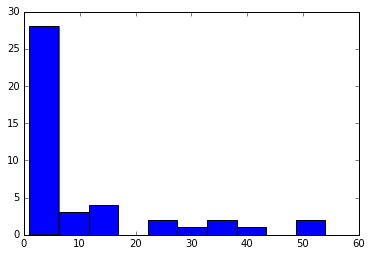

In [8]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(pdf_page_numbers)
plt.hist(y);
plt.show()